# Brief check of opinion convergence rates in new model

James Yu, 22 July 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [2]:
def convergence_rate(delta, c, lambda_j):
    return (2*c*lambda_j) / ((delta + delta*c*lambda_j**2 + c) + sqrt((c-delta-delta*c*lambda_j**2)**2 + 4*delta*c))

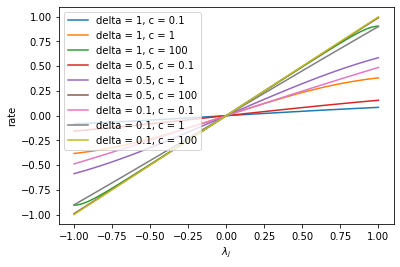

In [3]:
linsp = np.linspace(-1, 1, 100)

plt.plot(linsp, [convergence_rate(1, 0.1, lambda_j) for lambda_j in linsp], label = "delta = 1, c = 0.1")
plt.plot(linsp, [convergence_rate(1, 1, lambda_j) for lambda_j in linsp], label = "delta = 1, c = 1")
plt.plot(linsp, [convergence_rate(1, 100, lambda_j) for lambda_j in linsp], label = "delta = 1, c = 100")

plt.plot(linsp, [convergence_rate(0.5, 0.1, lambda_j) for lambda_j in linsp], label = "delta = 0.5, c = 0.1")
plt.plot(linsp, [convergence_rate(0.5, 1, lambda_j) for lambda_j in linsp], label = "delta = 0.5, c = 1")
plt.plot(linsp, [convergence_rate(0.5, 100, lambda_j) for lambda_j in linsp], label = "delta = 0.5, c = 100")

plt.plot(linsp, [convergence_rate(0.1, 0.1, lambda_j) for lambda_j in linsp], label = "delta = 0.1, c = 0.1")
plt.plot(linsp, [convergence_rate(0.1, 1, lambda_j) for lambda_j in linsp], label = "delta = 0.1, c = 1")
plt.plot(linsp, [convergence_rate(0.1, 100, lambda_j) for lambda_j in linsp], label = "delta = 0.1, c = 100")
plt.legend()
plt.xlabel("$\lambda_j$")
plt.ylabel("rate")
plt.show()

Note this is symmetric about $\lambda_j = 0$ which implies that the absolute value of the rate is increasing in the absolute value of $\lambda_j$. 

In [4]:
delta, c, lambda_j = symbols("delta c lambda_j")
rho = convergence_rate(delta, c, lambda_j)
rho

2*c*lambda_j/(c*delta*lambda_j**2 + c + delta + sqrt(4*c*delta + (-c*delta*lambda_j**2 + c - delta)**2))

In [5]:
deriv = simplify(diff(rho, lambda_j))
deriv

2*c*(-2*c*delta*lambda_j**2*(c*delta*lambda_j**2 - c + delta + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)) + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)*(c*delta*lambda_j**2 + c + delta + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)))/(sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)*(c*delta*lambda_j**2 + c + delta + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2))**2)

Note that everything here is positive except for a handful of terms on the left of the numerator. If we pull these out:

In [6]:
fraction(deriv)[0]

2*c*(-2*c*delta*lambda_j**2*(c*delta*lambda_j**2 - c + delta + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)) + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)*(c*delta*lambda_j**2 + c + delta + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)))

Then we can expand it:

In [7]:
expand(fraction(deriv)[0])

-2*c**3*delta**2*lambda_j**4 + 2*c**3 - 2*c**2*delta*lambda_j**2*sqrt(c**2*delta**2*lambda_j**4 - 2*c**2*delta*lambda_j**2 + c**2 + 2*c*delta**2*lambda_j**2 + 2*c*delta + delta**2) + 4*c**2*delta + 2*c**2*sqrt(c**2*delta**2*lambda_j**4 - 2*c**2*delta*lambda_j**2 + c**2 + 2*c*delta**2*lambda_j**2 + 2*c*delta + delta**2) + 2*c*delta**2 + 2*c*delta*sqrt(c**2*delta**2*lambda_j**4 - 2*c**2*delta*lambda_j**2 + c**2 + 2*c*delta**2*lambda_j**2 + 2*c*delta + delta**2)

We know $\lambda_j^2 \leq 1$ and $\delta \leq 1$ so $2c^3 - 2c^3 \delta^2 \lambda_j^4 = 2c^3 (1 - \delta^2 \lambda_j^4) \geq 0$.

Additionally, $2c^2 - 2c^2 \delta \lambda_j^2 = 2c^2 (1 - \delta \lambda_j^2) \geq 0$. This implies that the term is positive, so the entire derivative is positive (provided that $c > 0$, otherwise the convergence rate in question is always zero anyway).